# Exercises

Within your `codeup-data-science` directory, create a new directory named `clustering-exercises`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Save your clustering work in your `clustering-exercises` repo. Then add, commit, and push your changes.

For example, if the
exercise directs you to create a file named `myfile.py`, you should have
`clustering/myfile.py` in your repository.

If a file extension is specified, you should create that specific file. If there
is not file extension specified, you may either create a python script or a
jupyter notebook for the exercise.

!!!tip "Workflow"
    Throughout the exercises, you may wish to do your work in a notebook, then
    transfer any functions you've created to an external python script.

    Keep in mind this is not always a linear process! You will probably be
    cycling between a notebook and an external python script frequently.

    Remember to run your code often to check for correct output and/or errors.

## Acquire (acquire.py)

### Zillow

For the following, iterate through the steps you would take to create functions:
Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions. 

You will have a zillow.ipynb file and a helper file for each section in the pipeline. 


#### acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database. 
    - **_Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`._**  
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.  
    - Only include properties that include a latitude and longitude value.  

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)
3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

|                          | num_rows_missing | pct_rows_missing  |
| ------------------------ |-----------------:| -----------------:|
| parcelid                 | 0                | 0.000000          |
| airconditioningtypeid    | 29041            | 0.535486          |
| architecturalstyletypeid | 54232            | 0.999982          |


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values. 


| num_cols_missing  | pct_cols_missing | num_rows  |
| ----------------- |-----------------:| ---------:|
| 23                | 38.333           | 108       |
| 24                | 40.000           | 123       |
| 25                | 41.667           | 5280      |

#### Prepare 

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.  

1. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).  
    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column.  i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing). 
    - The output:
        - The dataframe with the columns and rows dropped as indicated. *Be sure to drop the columns prior to the rows in your function.*
    - hint:
        - Look up the dropna documentation. 
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.

1. Decide how to handle the remaining missing values: 
    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column
    

#### wrangle_zillow.py

Functions of the work above needed to acquire and prepare a new sample of data. 


# Exercise Begin

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 70
# pd.options.display.float_format = '{:20,.2f}'.format


import wrangle

#### acquire & summarize



1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database. 
    - **_Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`._**  
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.  
    - Only include properties that include a latitude and longitude value.  



In [2]:
SQLquery ="""
SELECT 
    *
FROM
    zillow.properties_2017
        RIGHT JOIN zillow.predictions_2017 USING(parcelid)
        LEFT JOIN zillow.airconditioningtype using(airconditioningtypeid)
        LEFT JOIN zillow.architecturalstyletype using(architecturalstyletypeid)
        LEFT JOIN zillow.heatingorsystemtype using(heatingorsystemtypeid)
        LEFT JOIN zillow.propertylandusetype USING (propertylandusetypeid)
        LEFT JOIN zillow.typeconstructiontype USING (typeconstructiontypeid) 
        LEFT JOIN zillow.storytype USING (storytypeid)
WHERE
	propertylandusetypeid = 261
;
"""

In [3]:
df = wrangle.get_data()
df = df.drop_duplicates(subset='parcelid')
df.shape


(52320, 68)

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)


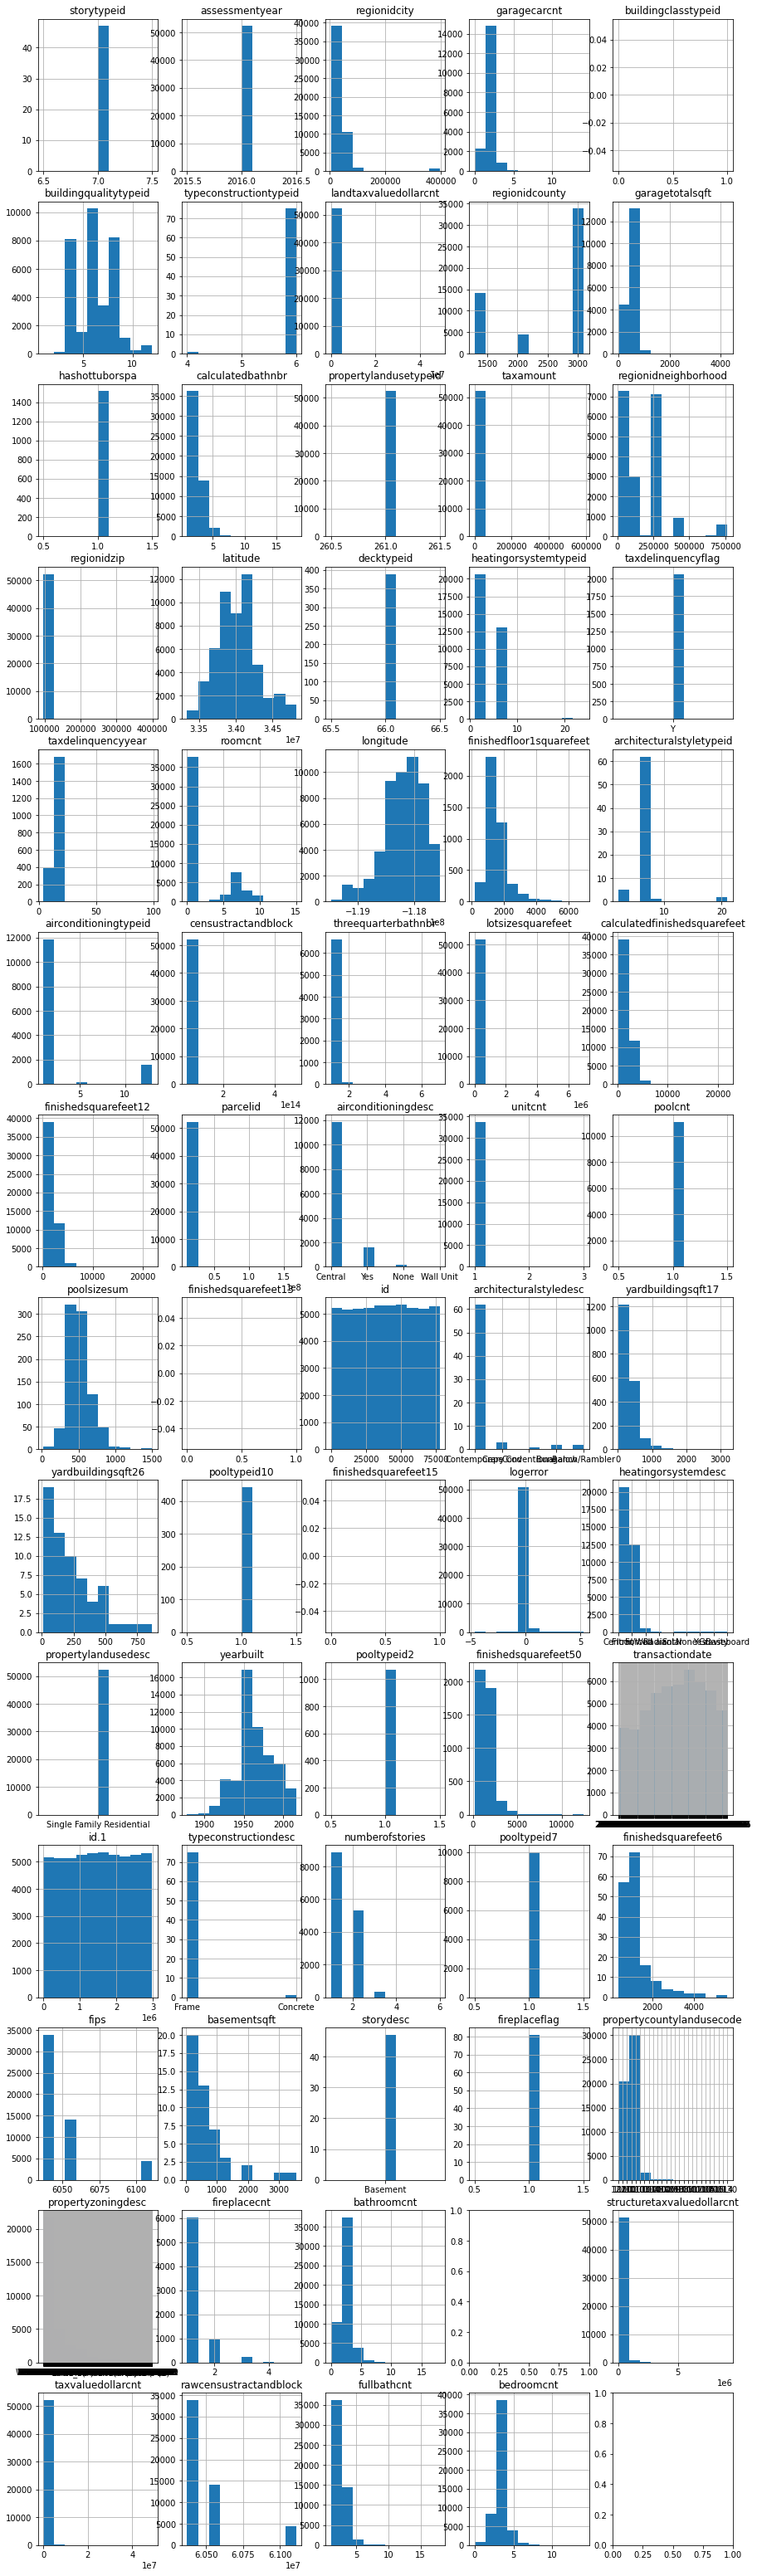

In [4]:
def all_the_hist(df):
    import math
    vizcols = 5
    vizrows = math.ceil(len(df.columns)/vizcols)
    out = []
    fig, ax = plt.subplots(vizrows, vizcols, figsize=(15,vizrows*4))
    for i, col in enumerate(df):
        r, c = i % vizrows, i % vizcols
        a = ax[r][c]
        a.set_title(col)
        df[col].hist(ax=a)
    fig

all_the_hist(df)

In [5]:
def get_highcounts(df):
    """Returns a dataframe containing the 4 highest value counts for each column.
    Or in the case of continuous variables, the counts of 4 bins."""
    categorical_types =['object','string','bool','category'] # The dtypes we will treat as categorical. Might not be a complete list.
    d = {} # The dictionary we will build
    # Loop through each column
    for col in df:
        # and get the highest 4 (value, count) tuples using .head() and .iteritems()
        if df[col].dtype in categorical_types:
            d[col] = (  list(df[col].value_counts(dropna = False).head(4).iteritems()) )
        # Make sure there are more than 4 values before we try binning
        elif df[col].nunique() > 4:
            d[col] = (  list(df[col].value_counts(bins = 4, dropna=False).iteritems()) )
        # And then get the rest.
        else:
            d[col] = (  list(df[col].value_counts(dropna = False).head(4).iteritems()) )

    # Build the dataframe using from_dict and orient="index"
    outdf = pd.DataFrame.from_dict(d, orient='index')
    # Rename the columns for ease of access
    outdf.columns = ['highcount_'+str(col) for col in outdf]
    return outdf

get_highcounts(df)

,highcount_0,highcount_1,highcount_2,highcount_3
storytypeid,"(nan, 52273)","(7.0, 47)",None,None
typeconstructiontypeid,"(nan, 52244)","(6.0, 75)","(4.0, 1)",None
propertylandusetypeid,"(261.0, 52320)",None,None,None
heatingorsystemtypeid,"((0.976, 6.75], 21213)","((6.75, 12.5], 12529)","((18.25, 24.0], 86)","((12.5, 18.25], 22)"
architecturalstyletypeid,"((6.75, 11.5], 63)","((1.9800000000000002, 6.75], 5)","((16.25, 21.0], 2)","((11.5, 16.25], 0)"
airconditioningtypeid,"(nan, 38705)","(1.0, 11873)","(13.0, 1567)","(5.0, 159)"
parcelid,"((10554879.015, 49955851.0], 52301)","((128443843.0, 167687839.0], 18)","((49955851.0, 89199847.0], 1)","((89199847.0, 128443843.0], 0)"
id,"((38806.0, 58209.0], 13254)","((19403.0, 38806.0], 13078)","((58209.0, 77612.0], 13036)","((-77.613, 19403.0], 12952)"
logerror,"((-2.176, 0.304], 50950)","((0.304, 2.783], 1338)","((-4.666, -2.176], 23)","((2.783, 5.263], 9)"
transactiondate,"(2017-06-30, 807)","(2017-04-28, 616)","(2017-05-31, 564)","(2017-07-28, 544)"


In [6]:
def col_summary(df):
    """Returns a dataframe full of statistics about each column in a dataframe.
    Useful for scrubbing datatypes and handling nulls."""
    # Build the datatype column
    dt = pd.DataFrame(df.dtypes)
    dt.columns = ['dtype']
    # Count of nulls column
    ns = pd.DataFrame(df.isna().sum())
    ns.columns = ['null_sum']
    # Percentage of nulls column
    nm = pd.DataFrame(df.isna().mean())
    nm.columns = ['null_mean']
    # Count of unique values
    nu = pd.DataFrame(df.nunique())
    nu.columns = ['n_unique']
    # Count of possible hidden nulls
    d = {}
    for col in df:
        d[col] = df[col].apply(lambda x: str(x).strip() == '' or str(x).strip().lower() in ['na','n/a']).sum()
    hnulls = pd.DataFrame.from_dict(d, orient='index')
    hnulls.columns = ['hidden_nulls']


    out = pd.concat([dt, ns, nm, hnulls, nu], axis=1)
    out['duplicates'] = len(df) - out['n_unique']

    return out


pd.options.display.max_rows = 70
summary = col_summary(df)
summary.head()

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
storytypeid,float64,52273,0.999102,0,1,52319
typeconstructiontypeid,float64,52244,0.998547,0,2,52318
propertylandusetypeid,float64,0,0.000000,0,1,52319
heatingorsystemtypeid,float64,18470,0.353020,0,9,52311
architecturalstyletypeid,float64,52250,0.998662,0,5,52315


In [7]:
pd.options.display.max_rows = 70
summary.sort_values('null_mean')

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
bedroomcnt,float64,0,0.000000,0,14,52306
regionidcounty,float64,0,0.000000,0,3,52317
longitude,float64,0,0.000000,0,50764,1556
roomcnt,float64,0,0.000000,0,16,52304
fips,float64,0,0.000000,0,3,52317
latitude,float64,0,0.000000,0,50478,1842
bathroomcnt,float64,0,0.000000,0,22,52298
rawcensustractandblock,float64,0,0.000000,0,31440,20880
id.1,int64,0,0.000000,0,52320,0
propertylandusedesc,object,0,0.000000,0,1,52319


In [8]:
def get_gotchas(df):
    out = {
        'possible_ids': [],
        'possible_bools': []
        }
    summary = col_summary(df)
    for name, row in summary.iterrows():
        if len(df) - row.loc['n_unique'] <= 1:
            out['possible_ids'].append(name)
        if row.loc['n_unique'] in [1,2]:
            out['possible_bools'].append(name)

    return out
get_gotchas(df)

{'possible_ids': ['parcelid', 'id', 'id.1'],
 'possible_bools': ['storytypeid',
  'typeconstructiontypeid',
  'propertylandusetypeid',
  'decktypeid',
  'hashottuborspa',
  'poolcnt',
  'pooltypeid10',
  'pooltypeid2',
  'pooltypeid7',
  'fireplaceflag',
  'assessmentyear',
  'taxdelinquencyflag',
  'propertylandusedesc',
  'typeconstructiondesc',
  'storydesc']}

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

|                          | num_rows_missing | pct_rows_missing  |
| ------------------------ |-----------------:| -----------------:|
| parcelid                 | 0                | 0.000000          |
| airconditioningtypeid    | 29041            | 0.535486          |
| architecturalstyletypeid | 54232            | 0.999982          |




In [9]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

nulls_by_row(df)

,parcelid,num_cols_missing,percent_cols_missing
28116,167687839,47,69.117647
9001,167686999,47,69.117647
41468,17188862,46,67.647059
13429,14460039,45,66.176471
22087,14325627,44,64.705882
...,...,...,...
83,14172985,23,33.823529
26551,14371475,23,33.823529
39642,14292517,23,33.823529
22117,14465914,22,32.352941


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values. 


| num_cols_missing  | pct_cols_missing | num_rows  |
| ----------------- |-----------------:| ---------:|
| 23                | 38.333           | 108       |
| 24                | 40.000           | 123       |
| 25                | 41.667           | 5280      |



In [10]:
df.isna().sum(axis=1)

0        35
1        32
2        33
3        31
4        28
         ..
52436    33
52437    32
52438    31
52439    31
52440    33
Length: 52320, dtype: int64

#### Prepare 



1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.  



> What is a single-family home?
> The legal description for this home is “a structure maintained and used as a single dwelling unit.” So what does that mean, exactly? A single dwelling unit will have these characteristics:
> 
> **No common walls:** This home is a stand-alone, detached property, says agent Chrisoula Papoutsakis, a real estate agent with Triplemint in New York. This means that the home doesn’t share common walls or a roof with any other dwelling.
> 
> **Land:** A single-family home has no shared property but is built on its own parcel of land.
> 
> **Entrance and exit:** A single-family home has its own private and direct access to a street or thoroughfare. This is as opposed to an apartment, which has hallways and a lobby that lead to street access.
> 
> **Utilities:** Only one set of utilities can service this home—and may not be shared in any way with another residence. This applies to heating, electricity, water, or any other essential service.
> 
> **One owner:** This home is built as the residence for one family, person, or household, whose owner has an undivided interest in the unit.
> 
> **Single kitchen:** This kind of home has one kitchen. Adding a kitchen to an in-law suite or carriage house will alter a home’s zoning classification.

In [11]:
df[~(df.unitcnt > 1)].shape

(52292, 68)

In [12]:
df[~(df.lotsizesquarefeet < df.calculatedfinishedsquarefeet)].shape

(51844, 68)

In [13]:
(df.lotsizesquarefeet < df.calculatedfinishedsquarefeet).sum()


476

In [14]:
df[(df.calculatedfinishedsquarefeet < 500)]

,storytypeid,typeconstructiontypeid,propertylandusetypeid,heatingorsystemtypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,transactiondate,id.1,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,propertylandusedesc,typeconstructiondesc,storydesc
84,NaN,NaN,261.0,NaN,NaN,NaN,13854120,127,0.618889,2017-01-03,1158635,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,480.0,480.0,NaN,NaN,NaN,NaN,6059.0,NaN,1.0,NaN,NaN,NaN,33919726.0,-117955103.0,3000.0,NaN,NaN,NaN,NaN,NaN,122,NaN,6.059001e+07,18874.0,1286.0,NaN,96186.0,4.0,NaN,NaN,NaN,NaN,1926.0,1.0,NaN,4720.0,13817.0,2016.0,9097.0,419.86,Y,14.0,6.059001e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
88,NaN,NaN,261.0,NaN,NaN,NaN,13840290,131,0.147591,2017-01-03,1158586,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,455.0,455.0,NaN,NaN,NaN,NaN,6059.0,NaN,1.0,1.0,216.0,NaN,33744896.0,-117877876.0,1904.0,NaN,NaN,NaN,NaN,NaN,122,NaN,6.059075e+07,47568.0,1286.0,268403.0,97003.0,4.0,NaN,NaN,NaN,NaN,1922.0,2.0,NaN,11544.0,86152.0,2016.0,74608.0,1305.58,NaN,NaN,6.059075e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2899,NaN,NaN,261.0,NaN,NaN,NaN,12146026,4333,-0.661313,2017-01-20,856504,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.0,280.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,34113439.0,-118024905.0,8318.0,1.0,NaN,NaN,NaN,1.0,0109,ARR1YY,6.037431e+07,50749.0,3101.0,NaN,96267.0,0.0,NaN,NaN,NaN,NaN,1953.0,NaN,NaN,9137.0,963472.0,2016.0,954335.0,11016.31,NaN,NaN,6.037431e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3261,NaN,NaN,261.0,7.0,NaN,NaN,11973950,4884,0.090049,2017-01-23,1601549,NaN,1.0,0.0,NaN,5.0,1.0,NaN,NaN,288.0,288.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,34124892.0,-118201807.0,5001.0,NaN,NaN,NaN,NaN,NaN,0100,LAR1,6.037183e+07,12447.0,3101.0,115609.0,96023.0,0.0,NaN,1.0,NaN,NaN,1922.0,NaN,NaN,6281.0,67521.0,2016.0,61240.0,805.17,NaN,NaN,6.037183e+13,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN
3565,NaN,NaN,261.0,NaN,NaN,NaN,13964165,5314,0.006132,2017-01-25,2233011,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,458.0,458.0,NaN,NaN,NaN,NaN,6059.0,NaN,1.0,NaN,NaN,NaN,33746927.0,-117618374.0,2250.0,NaN,NaN,NaN,NaN,NaN,122,NaN,6.059032e+07,16389.0,1286.0,NaN,96986.0,3.0,NaN,NaN,NaN,NaN,1934.0,2.0,NaN,8937.0,250196.0,2016.0,241259.0,2604.46,NaN,NaN,6.059032e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50717,NaN,NaN,261.0,NaN,NaN,NaN,12043393,75047,0.046986,2017-09-08,2272756,NaN,1.0,1.0,NaN,3.0,1.0,NaN,NaN,486.0,486.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,34225625.0,-118253571.0,7248.0,NaN,NaN,NaN,NaN,NaN,0100,GLR2YY,6.037300e+07,45457.0,3101.0,273400.0,96330.0,0.0,NaN,1.0,NaN,NaN,1938.0,NaN,NaN,59523.0,297619.0,2016.0,238096.0,3224.31,NaN,NaN,6.037300e+13,NaN,NaN,NaN,Single Family Residential,NaN,NaN
50992,NaN,NaN,261.0,7.0,NaN,NaN,12556809,75452,0.247499,2017-09-11,515102,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,378.0,378.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,33770666.0,-118170798.0,2

In [15]:
(df.bedroomcnt < 1).sum()

135

In [16]:
def zillow_trim_bad_data(df):
    # If it's not single unit, it's not a single family home.
    df = df[~(df.unitcnt > 1)]
    # If the lot size is smaller than the finished square feet, it's probably bad data or not a single family home
    df = df[~(df.lotsizesquarefeet < df.calculatedfinishedsquarefeet)]
    # If the finished square feet is less than 500 it is likeley an apartment, or bad data
    df = df[~(df.calculatedfinishedsquarefeet < 500)]
    # If there are no bedrooms, likely a loft or bad data
    df = df[~(df.bedroomcnt < 1)]

    return df

print(df.shape)
df = zillow_trim_bad_data(df)
print(df.shape)

(52320, 68)
(51617, 68)


1. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).  
    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column.  i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing). 
    - The output:
        - The dataframe with the columns and rows dropped as indicated. *Be sure to drop the columns prior to the rows in your function.*
    - hint:
        - Look up the dropna documentation. 
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.



In [17]:
round(.5 * len(df.index), 0)

25808.0

In [18]:
def handle_missing_values(df, drop_cols_threshold=0.75, drop_rows_threshold=0.75):
    threshold = int(round(drop_cols_threshold * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold) # axis 1, or ‘columns’ : Drop columns which contain missing value
    threshold = int(round(drop_rows_threshold * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold) # axis 0, or ‘index’ : Drop rows which contain missing values.
    return df

1. Decide how to handle the remaining missing values: 
    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column
    


In [19]:
d = get_gotchas(df)
d

{'possible_ids': ['parcelid', 'id', 'id.1'],
 'possible_bools': ['storytypeid',
  'typeconstructiontypeid',
  'propertylandusetypeid',
  'decktypeid',
  'hashottuborspa',
  'poolcnt',
  'pooltypeid10',
  'pooltypeid2',
  'pooltypeid7',
  'unitcnt',
  'fireplaceflag',
  'assessmentyear',
  'taxdelinquencyflag',
  'propertylandusedesc',
  'typeconstructiondesc',
  'storydesc']}

In [20]:
for col in d['possible_bools']:
    print(df[col].value_counts())

7.0    47
Name: storytypeid, dtype: int64
6.0    56
4.0     1
Name: typeconstructiontypeid, dtype: int64
261.0    51617
Name: propertylandusetypeid, dtype: int64
66.0    373
Name: decktypeid, dtype: int64
1.0    1509
Name: hashottuborspa, dtype: int64
1.0    11032
Name: poolcnt, dtype: int64
1.0    438
Name: pooltypeid10, dtype: int64
1.0    1071
Name: pooltypeid2, dtype: int64
1.0    9945
Name: pooltypeid7, dtype: int64
1.0    33561
Name: unitcnt, dtype: int64
1.0    67
Name: fireplaceflag, dtype: int64
2016.0    51617
Name: assessmentyear, dtype: int64
Y    2051
Name: taxdelinquencyflag, dtype: int64
Single Family Residential    51617
Name: propertylandusedesc, dtype: int64
Frame       56
Concrete     1
Name: typeconstructiondesc, dtype: int64
Basement    47
Name: storydesc, dtype: int64


In [21]:
df.hashottuborspa = (df.hashottuborspa == 1)

In [22]:
df.poolcnt = df.poolcnt.fillna(0)

In [23]:
df.taxdelinquencyflag = df.taxdelinquencyflag == 'Y'

In [24]:
dropcols = ['id', 'id.1','propertylandusedesc','propertylandusetypeid', 'unitcnt', 'assessmentyear', ]
df = df.drop(columns=dropcols)

In [25]:
round(.3*len(df.index))

15485

In [26]:
df = handle_missing_values(df)
col_summary(df).sort_index()

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
bathroomcnt,float64,0,0.000000,0,21,51596
bedroomcnt,float64,0,0.000000,0,11,51606
calculatedbathnbr,float64,31,0.000601,0,20,51597
calculatedfinishedsquarefeet,float64,8,0.000155,0,4654,46963
censustractandblock,float64,107,0.002073,0,31131,20486
finishedsquarefeet12,float64,161,0.003119,0,4651,46966
fips,float64,0,0.000000,0,3,51614
fullbathcnt,float64,31,0.000601,0,12,51605
hashottuborspa,bool,0,0.000000,0,2,51615
landtaxvaluedollarcnt,float64,1,0.000019,0,36359,15258


In [27]:
def zillow_impute(df):
    from sklearn.impute import KNNImputer
    kimputer = KNNImputer()
    x = df[['latitude','longitude','regionidcity']]
    y = kimputer.fit_transform(x)
    df[['latitude','longitude','regionidcity']] = y
    return df
df = zillow_impute(df)
col_summary(df).sort_index()

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
bathroomcnt,float64,0,0.000000,0,21,51596
bedroomcnt,float64,0,0.000000,0,11,51606
calculatedbathnbr,float64,31,0.000601,0,20,51597
calculatedfinishedsquarefeet,float64,8,0.000155,0,4654,46963
censustractandblock,float64,107,0.002073,0,31131,20486
finishedsquarefeet12,float64,161,0.003119,0,4651,46966
fips,float64,0,0.000000,0,3,51614
fullbathcnt,float64,31,0.000601,0,12,51605
hashottuborspa,bool,0,0.000000,0,2,51615
landtaxvaluedollarcnt,float64,1,0.000019,0,36359,15258


In [28]:
df = df.dropna()
col_summary(df)

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
parcelid,int64,0,0.0,0,50951,0
logerror,float64,0,0.0,0,50700,251
transactiondate,object,0,0.0,0,257,50694
bathroomcnt,float64,0,0.0,0,20,50931
bedroomcnt,float64,0,0.0,0,11,50940
calculatedbathnbr,float64,0,0.0,0,20,50931
calculatedfinishedsquarefeet,float64,0,0.0,0,4623,46328
finishedsquarefeet12,float64,0,0.0,0,4623,46328
fips,float64,0,0.0,0,3,50948
fullbathcnt,float64,0,0.0,0,12,50939


### Outliers

In [29]:
def get_upper_outliers(s, k=1.5):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def get_lower_outliers(s, k=1.5):
    '''
    Given a series and a cutoff value, k, returns the lower outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the lower bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    return s.apply(lambda x: min([x - lower_bound, 0]))

In [30]:
def format_float(x):
    return ("{:.2f}".format(x))
get_upper_outliers(df.taxvaluedollarcnt).describe().apply(format_float)

count       50951.00
mean        69420.71
std        523737.30
min             0.00
25%             0.00
50%             0.00
75%             0.00
max      24136551.25
Name: taxvaluedollarcnt, dtype: object

In [31]:
get_upper_outliers(df.taxvaluedollarcnt)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52436    0.0
52437    0.0
52438    0.0
52439    0.0
52440    0.0
Name: taxvaluedollarcnt, Length: 50951, dtype: float64

In [32]:
def build_upper_outliers(df, k=1.5):
    """For the columns that are numerical return a dataframe that contains only the upper outliers defined by k*IQR.
    """
    out = pd.DataFrame()
    for col in df.select_dtypes('number'):
        colname_upper = col + '_upper_outliers'
        out = pd.concat([out, get_upper_outliers(df[col], k)], axis=1)
        out = out.rename(columns={col: colname_upper})
    return out

In [33]:
def build_lower_outliers(df, k=1.5):
    """For the columns that are numerical return a dataframe that contains only the lower outliers defined by k*IQR.
    """
    out = pd.DataFrame()
    for col in df.select_dtypes('number'):
        colname_lower = col + '_lower_outliers'
        out = pd.concat([out, get_lower_outliers(df[col], k)], axis=1)
        out = out.rename(columns={col: colname_lower})
    return out

In [34]:
def build_all_outliers(df, k=1.5):
    d1 = build_upper_outliers(df, k)
    d2 = build_lower_outliers(df, k)
    out = pd.concat((d1,d2), axis=1)
    return out

In [47]:
lower = build_lower_outliers(df)
lower.describe().T.sort_values(by='min').apply(lambda x : x.apply(format_float))

,count,mean,std,min,25%,50%,75%,max
longitude_lower_outliers,47617.00,-3993.55,24303.54,-397988.50,0.00,0.00,0.00,0.00
lotsizesquarefeet_lower_outliers,47617.00,-0.11,5.88,-454.50,0.00,0.00,0.00,0.00
yearbuilt_lower_outliers,47617.00,-0.04,0.66,-31.50,0.00,0.00,0.00,0.00
logerror_lower_outliers,47617.00,-0.01,0.07,-4.54,0.00,0.00,0.00,0.00
bedroomcnt_lower_outliers,47617.00,-0.00,0.05,-0.50,0.00,0.00,0.00,0.00
landtaxvaluedollarcnt_lower_outliers,47617.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
taxvaluedollarcnt_lower_outliers,47617.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
structuretaxvaluedollarcnt_lower_outliers,47617.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
roomcnt_lower_outliers,47617.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
regionidzip_lower_outliers,47617.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [36]:
upper = build_upper_outliers(df)
upper.describe().T.apply(lambda x : x.apply(format_float)).sort_index()

,count,mean,std,min,25%,50%,75%,max
bathroomcnt_upper_outliers,50951.00,0.03,0.24,0.00,0.00,0.00,0.00,8.50
bedroomcnt_upper_outliers,50951.00,0.01,0.12,0.00,0.00,0.00,0.00,5.50
calculatedbathnbr_upper_outliers,50951.00,0.03,0.24,0.00,0.00,0.00,0.00,8.50
calculatedfinishedsquarefeet_upper_outliers,50951.00,50.45,383.79,0.00,0.00,0.00,0.00,18084.50
censustractandblock_upper_outliers,50951.00,24712012043.40,1870766967997.28,0.00,0.00,0.00,0.00,422115063056258.00
finishedsquarefeet12_upper_outliers,50951.00,50.45,383.79,0.00,0.00,0.00,0.00,18084.50
fips_upper_outliers,50951.00,1.60,5.28,0.00,0.00,0.00,0.00,19.00
fullbathcnt_upper_outliers,50951.00,0.03,0.23,0.00,0.00,0.00,0.00,8.50
landtaxvaluedollarcnt_upper_outliers,50951.00,45293.73,383531.38,0.00,0.00,0.00,0.00,21432372.75
latitude_upper_outliers,50951.00,24.16,1138.77,0.00,0.00,0.00,0.00,93005.25


In [42]:
df_upper = df[(upper.taxvaluedollarcnt_upper_outliers != 0)]
df = df[~(upper.taxvaluedollarcnt_upper_outliers != 0)]

In [38]:
upper = build_upper_outliers(df)
upper.describe().T.sort_values(by='max').apply(lambda x : x.apply(format_float))

,count,mean,std,min,25%,50%,75%,max
longitude_upper_outliers,50951.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
regionidcounty_upper_outliers,50951.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
yearbuilt_upper_outliers,50951.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
poolcnt_upper_outliers,50951.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
roomcnt_upper_outliers,50951.00,0.00,0.02,0.00,0.00,0.00,0.00,2.50
logerror_upper_outliers,50951.00,0.02,0.12,0.00,0.00,0.00,0.00,5.13
bedroomcnt_upper_outliers,50951.00,0.01,0.12,0.00,0.00,0.00,0.00,5.50
bathroomcnt_upper_outliers,50951.00,0.03,0.24,0.00,0.00,0.00,0.00,8.50
calculatedbathnbr_upper_outliers,50951.00,0.03,0.24,0.00,0.00,0.00,0.00,8.50
fullbathcnt_upper_outliers,50951.00,0.03,0.23,0.00,0.00,0.00,0.00,8.50


In [46]:
def drop_upper_outliers(df, cols, k=1.5):
    #function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        df = df[(df[col] < upper_bound)]
    return df

def drop_lower_outliers(df, cols, k=1.5):
    #function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] > lower_bound)]
    return df

def drop_upper_and_lower_outliers(df, cols, k=1.5):
    #function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [48]:
df.shape

(47617, 28)

In [49]:
outlier_cols =['taxvaluedollarcnt','lotsizesquarefeet','structuretaxvaluedollarcnt']
df = drop_upper_outliers(df, outlier_cols)
df.shape

(40474, 28)


#### wrangle_zillow.py

Functions of the work above needed to acquire and prepare a new sample of data. 


In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = 70
# pd.options.display.float_format = '{:20,.2f}'.format

import wrangle

In [2]:
train, test, validate = wrangle.wrangle_zillow()

In [3]:
train.shape, test.shape, validate.shape

((24603, 22), (10227, 22), (10227, 22))

### Mall Customers

#### notebook

1. Acquire data from mall_customers.customers in mysql database. 


In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mall_acquire
import my_toolkit

In [26]:
df = mall_acquire.get_data()
df.shape

(200, 5)

In [27]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.columns.to_list()

['customer_id', 'gender', 'age', 'annual_income', 'spending_score']

2. Summarize data (include distributions and descriptive statistics).


In [29]:
my_toolkit.col_summary(df)

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
customer_id,int64,0,0.00,0,200,0
gender,object,0,0.00,0,2,198
age,int64,0,0.00,0,51,149
annual_income,int64,0,0.00,0,64,136
spending_score,int64,0,0.00,0,84,116


In [4]:
my_toolkit.get_gotchas(df)

{'possible_ids': ['customer_id'], 'possible_bools': ['gender']}

In [5]:
my_toolkit.get_highcounts(df)

,highcount_0,highcount_1,highcount_2,highcount_3
customer_id,"((0.8, 50.75], 50)","((50.75, 100.5], 50)","((100.5, 150.25], 50)","((150.25, 200.0], 50)"
gender,"(Female, 112)","(Male, 88)",None,None
age,"((17.947, 31.0], 70)","((31.0, 44.0], 61)","((44.0, 57.0], 43)","((57.0, 70.0], 26)"
annual_income,"((45.5, 76.0], 86)","((14.877, 45.5], 58)","((76.0, 106.5], 48)","((106.5, 137.0], 8)"
spending_score,"((25.5, 50.0], 64)","((50.0, 74.5], 54)","((74.5, 99.0], 43)","((0.901, 25.5], 39)"


In [6]:
def all_the_hist(df):
    import math
    vizcols = 3
    vizrows = math.ceil(len(df.columns)/vizcols)
    fig, ax = plt.subplots(vizrows, vizcols, figsize=(15,vizrows*4))
    for i, col in enumerate(df):
        r, c = i % vizrows, i % vizcols
        a = ax[r][c]
        a.set_title(col)
        df[col].hist(ax=a)
    fig

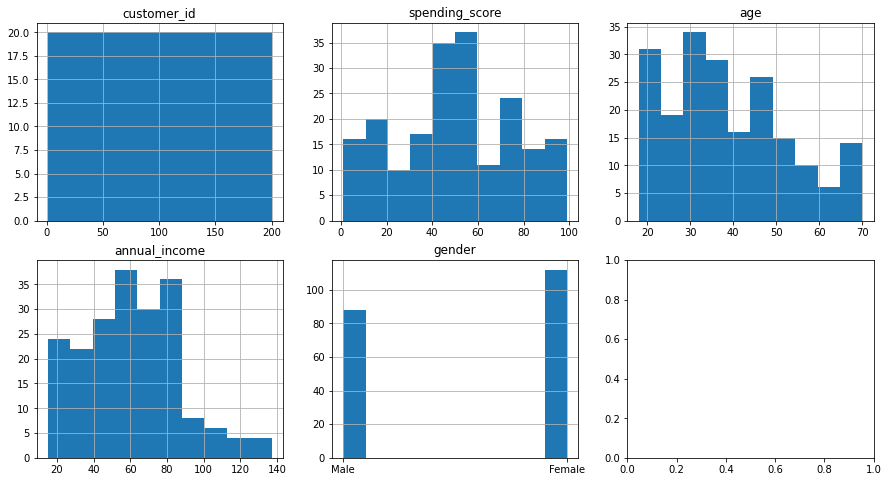

In [7]:
all_the_hist(df)

2. Detect outliers using IQR.


In [11]:
my_toolkit.build_all_outliers(df).describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
age_lower_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
age_upper_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
annual_income_lower_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
annual_income_upper_outliers,200.00,0.04,0.42,0.00,0.00,0.00,0.00,4.25
customer_id_lower_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
customer_id_upper_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
spending_score_lower_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
spending_score_upper_outliers,200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


3. Split data (train, validate, and test split).


In [12]:
test, train, validate = my_toolkit.train_validate_test_split(df)
test.shape, train.shape, validate.shape

((80, 5), (60, 5), (60, 5))

3. Encode categorical columns using a one hot encoder (pd.get_dummies).


In [30]:
df.gender = df.gender == 'Male'


In [31]:
df = df.rename(columns={'gender':'is_male'})


88

In [33]:
df.is_male.sum()

88

In [32]:
test, train, validate = my_toolkit.train_validate_test_split(df)
test.shape, train.shape, validate.shape

((80, 5), (60, 5), (60, 5))

4. Handles missing values.


In [34]:
df.isna().sum()

customer_id       0
is_male           0
age               0
annual_income     0
spending_score    0
dtype: int64

5. Scaling


In [35]:
def train_scaler(df, kind='min_max'):
    match kind:
        case 'min_max':
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
    scaler.fit(df)
    return scaler

In [36]:
scaler = train_scaler(train[['age', 'annual_income']])

In [37]:
def scale_df(df, scaler):
    X = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns )
    return X

In [39]:
scale_df(train[['age', 'annual_income']], scaler)

,age,annual_income
52,0.25,0.25
65,0.00,0.30
6,0.33,0.03
24,0.69,0.12
129,0.38,0.50
3,0.10,0.01
77,0.42,0.35
193,0.38,0.88
76,0.52,0.35
119,0.62,0.47



#### wrangle_mall.py 

1. Acquire data from mall_customers.customers in mysql database. 
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
3. Missing values
4. Scaling